In [1]:
import qiskit as qk
import qiskit_aer as qa
from qiskit.primitives import Sampler
from qiskit.circuit.library import PhaseOracle
%matplotlib inline

In [2]:
quantum_register = qk.QuantumRegister(2) # Створюємо двокубітну систему / Creating 2-qbit system
classiclal_register = qk.ClassicalRegister(1) # Створюємо 1 класичний біт для зберігання відповіді / Creating 1 bit to store the answer
circuit = qk.QuantumCircuit(quantum_register, classiclal_register) # Ініціалізуємо квантову схему / Intializing quantum circuit

In [3]:
"""
Не сталі (Non-constant)  |  Сталі (Constants)
----------------------------------
    func(a) = a          |   func(a) = a & ~a
    func(a) = ~a         |   func(a) = a | ~a
"""

non_constant_functions = ["a", "~a"]
constant_functions = ["a & ~a", "a | ~a"]

oracle = PhaseOracle(constant_functions[0])  # Створюємо оракула / Creating an oracle

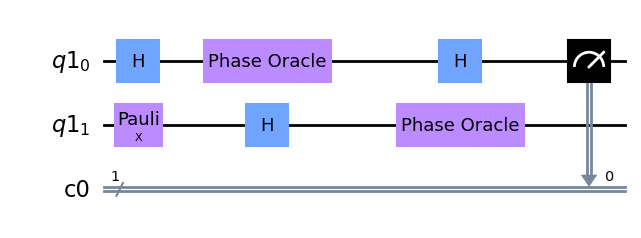

In [4]:
# Застосовуємо вентль Паулі Х до другого кубіту / Applying Pauli X gate to the second qubit
circuit.pauli(pauli_string="X", qubits=[quantum_register[1]])

# Застосовуємо вентиль Адамара до усього регістру / Apllying Hadamard gate to the whole register
circuit.h(quantum_register)

# Застосовуємо оракула до кожного кубіту / Applying oracle individually to each qubit
circuit.append(oracle, [quantum_register[0]])
circuit.append(oracle, [quantum_register[1]])

# Застосовуємо вентиль Адамара до першого кубіту / Applying Hadamard gate to the first qubit
circuit.h(quantum_register[0])

# Вимірюємо перший кубіт / Measuring the first qubit
circuit.measure(quantum_register[0], classiclal_register)

# Малюємо красиву картинку / Drawing pretty picture
circuit.draw(output="mpl", style="clifford")

In [5]:
# Створюємо бекенд для симуляції / Creating backend for the simulation
simulator = qa.Aer.get_backend('qasm_simulator')

# Створюємо Sampler для локальної симуляції / Creating Sampler to run simulation localy
sampler = Sampler()

# Проводимо симуляцію / Running simulation of the circuit
job = sampler.run(circuits=[circuit])

# Одержуємо результат / Getting result
result = job.result()

# Виводимо відповідь на задачу Дойча / Printing an answer to the Deutsch problem
if 0 in result.quasi_dists[0]:
    print("The function is constant")
else:
    print("The function is non-constant")

# Виводимо діаграму / Plotting histogram
# qk.visualization.plot_distribution(result.quasi_dists[0]) 

The function is constant
